## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
import os
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.datasets import load_boston, load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, r2_score, mean_squared_error

### Boston Data

In [3]:
boston = load_boston()

X, y = boston.data, boston.target
print('Boston data shape: {}'.format(X.shape))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

depth_range = np.arange(1, 10)
sample_leaf_range = np.arange(1, 10, 5)
samples_split_range = np.arange(2, 10, 2)

grid_para = {'max_depth':depth_range, 'min_samples_leaf': sample_leaf_range,
             'min_samples_split': samples_split_range}

tree_reg = DecisionTreeRegressor()
cv_tree_reg = GridSearchCV(tree_reg, grid_para, cv=5)
cv_tree_reg.fit(x_train, y_train)
print('Best Parameters: {}'.format(cv_tree_reg.best_params_))
print('-' * 50)

y_pred = cv_tree_reg.predict(x_test)
r_square = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R_square: {}, mse: {}'.format(r_square, mse))

Boston data shape: (506, 13)
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 4}
--------------------------------------------------
R_square: 0.7313506787917223, mse: 24.127975533739555


/anaconda3/envs/python3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


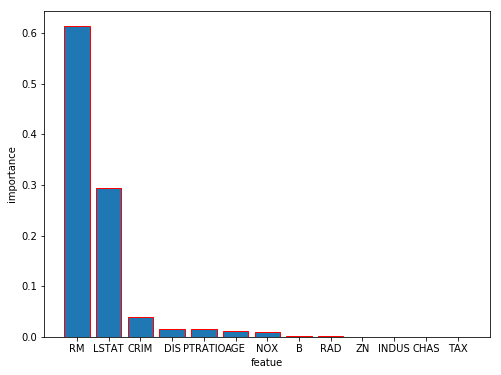

In [4]:
feature_importance = {'feature': boston.feature_names, 'importance': cv_tree_reg.best_estimator_.feature_importances_}
import_df = pd.DataFrame(feature_importance).sort_values(by='importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(8, 6))
plt.bar(x=import_df['feature'], height=import_df['importance'], align='center', edgecolor='red')
plt.xlabel('featue')
plt.ylabel('importance')
plt.show()

### Boston Data after feature selection

In [5]:
import_feature = import_df[import_df['importance'] > 0]['feature'].tolist()
bostom_df = pd.DataFrame(data=X, columns=boston.feature_names)[import_feature]

x_train, x_test, y_train, y_test = train_test_split(bostom_df, y, test_size=0.3)

depth_range = np.arange(1, 10)
sample_leaf_range = np.arange(1, 20, 5)
samples_split_range = np.arange(2, 20, 2)

grid_para = {'max_depth':depth_range, 'min_samples_leaf': sample_leaf_range,
             'min_samples_split': samples_split_range}

tree_reg = DecisionTreeRegressor()
cv_tree_reg = GridSearchCV(tree_reg, grid_para, cv=5)
cv_tree_reg.fit(x_train, y_train)
print('Best Parameters: {}'.format(cv_tree_reg.best_params_))
print('-' * 50)

y_pred = cv_tree_reg.predict(x_test)
r_square = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R_square: {}, mse: {}'.format(r_square, mse))

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 11, 'min_samples_split': 16}
--------------------------------------------------
R_square: 0.7924597949090573, mse: 16.65018594280941


/anaconda3/envs/python3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Wine Data

In [6]:
wine = load_wine()

X, y = wine.data, wine.target
x_train, x_test, y_train, y_test = train_test_split(X, y)

depth_range = np.arange(1, 10)
sample_leaf_range = np.arange(1, 20, 5)
samples_split_range = np.arange(2, 20, 2)

grid_para = {'max_depth':depth_range, 'min_samples_leaf': sample_leaf_range,
             'min_samples_split': samples_split_range}

tree_cls = DecisionTreeClassifier(criterion='gini')
cv_tree_cls = GridSearchCV(tree_cls, grid_para, cv=5)
cv_tree_cls.fit(x_train, y_train)
print('Best Parameters: {}'.format(cv_tree_cls.best_params_))
print('-' * 50)

y_pred = cv_tree_cls.predict(x_test)
print(classification_report(y_test, y_pred,
                            labels=np.unique(wine.target),
                            target_names=wine.target_names))

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
--------------------------------------------------
              precision    recall  f1-score   support

     class_0       0.90      0.82      0.86        11
     class_1       0.85      0.94      0.89        18
     class_2       1.00      0.94      0.97        16

   micro avg       0.91      0.91      0.91        45
   macro avg       0.92      0.90      0.91        45
weighted avg       0.92      0.91      0.91        45



/anaconda3/envs/python3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


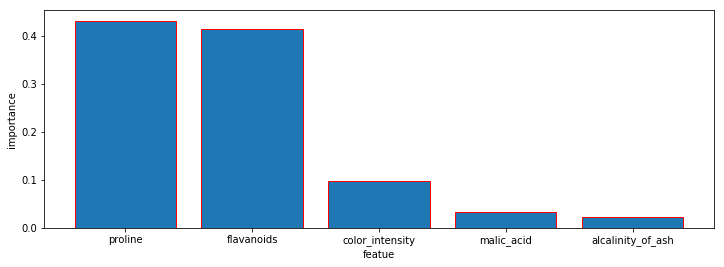

In [7]:
feature_importance = {'feature': wine.feature_names, 'importance': cv_tree_cls.best_estimator_.feature_importances_}
import_df = pd.DataFrame(feature_importance).sort_values(by='importance', ascending=False).reset_index(drop=True)
import_df = import_df[import_df['importance'] > 0]

plt.figure(figsize=(12, 4))
plot = plt.bar(x=import_df['feature'], height=import_df['importance'], align='center', edgecolor='red')
plt.xlabel('featue')
plt.ylabel('importance')
plt.show()

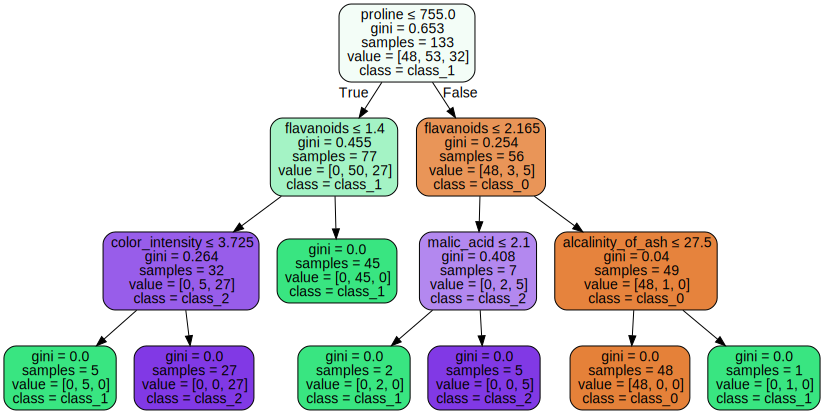

In [8]:
dot_data = export_graphviz(decision_tree=cv_tree_cls.best_estimator_,
                           out_file = None, feature_names = wine.feature_names,
                           filled = True, class_names = wine.target_names,
                           special_characters=True, rounded = True)
graph = graphviz.Source(dot_data)
graph

### Wine Data after feature selection

In [9]:
importance_featutce = import_df['feature'].tolist()
wine_df = pd.DataFrame(data=X, columns=wine.feature_names)[importance_featutce]

x_train, x_test, y_train, y_test = train_test_split(wine_df, y, test_size=0.3)

depth_range = np.arange(1, 10)
sample_leaf_range = np.arange(1, 20, 5)
samples_split_range = np.arange(2, 20, 2)

grid_para = {'max_depth':depth_range, 'min_samples_leaf': sample_leaf_range,
             'min_samples_split': samples_split_range}

tree_cls = DecisionTreeClassifier(criterion='gini')
cv_tree_cls = GridSearchCV(tree_cls, grid_para, cv=5)
cv_tree_cls.fit(x_train, y_train)
print('Best Parameters: {}'.format(cv_tree_cls.best_params_))
print('-' * 50)

y_pred = cv_tree_cls.predict(x_test)
print(classification_report(y_test, y_pred,
                            labels=np.unique(wine.target),
                            target_names=wine.target_names))

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4}
--------------------------------------------------
              precision    recall  f1-score   support

     class_0       0.94      0.89      0.92        19
     class_1       0.79      0.95      0.86        20
     class_2       1.00      0.80      0.89        15

   micro avg       0.89      0.89      0.89        54
   macro avg       0.91      0.88      0.89        54
weighted avg       0.90      0.89      0.89        54



/anaconda3/envs/python3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


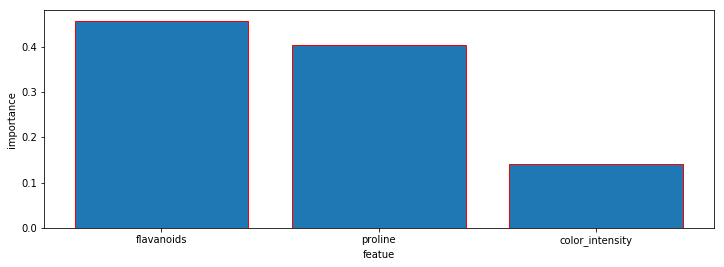

In [10]:
feature_importance = {'feature': wine_df.columns, 'importance': cv_tree_cls.best_estimator_.feature_importances_}
import_df = pd.DataFrame(feature_importance).sort_values(by='importance', ascending=False).reset_index(drop=True)
import_df = import_df[import_df['importance'] > 0]

plt.figure(figsize=(12, 4))
plot = plt.bar(x=import_df['feature'], height=import_df['importance'], align='center', edgecolor='red')
plt.xlabel('featue')
plt.ylabel('importance')
plt.show()

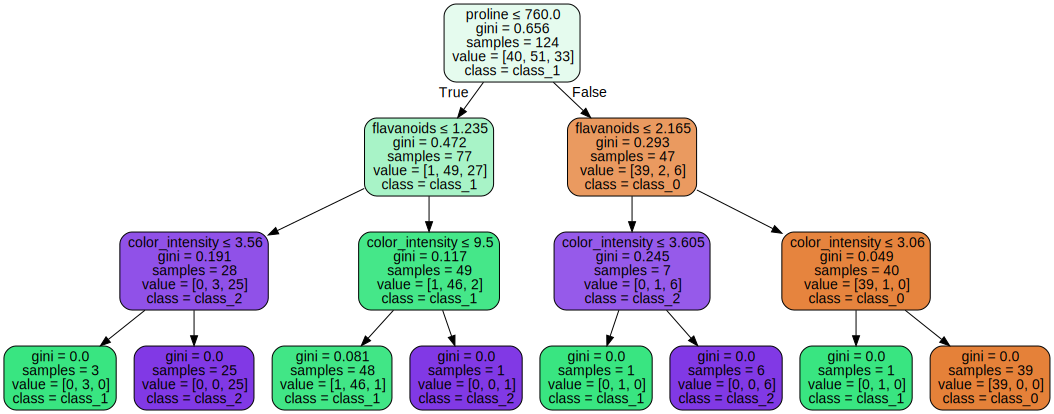

In [11]:
dot_data = export_graphviz(decision_tree=cv_tree_cls.best_estimator_,
                           out_file=None, feature_names=wine_df.columns,
                           filled=True, class_names=wine.target_names,
                           special_characters=True, rounded=True)
graph = graphviz.Source(dot_data)
graph